Best fitness in generation 0 : 1308.619713664287
Best fitness in generation 10 : 963.4403694428914
Best fitness in generation 20 : 827.440357277137
Best fitness in generation 30 : 689.049641561686
Best fitness in generation 40 : 655.6005303055972
Best fitness in generation 50 : 596.7048619218516
Best fitness in generation 60 : 575.0895286356122
Best fitness in generation 70 : 555.262841199688
Best fitness in generation 80 : 550.5119080406872
Best fitness in generation 90 : 548.7798093347546
Best fitness in generation 100 : 548.7798093347546
Best fitness in generation 110 : 548.7798093347546
Best fitness in generation 120 : 545.2145917332514
Best fitness in generation 130 : 545.2145917332514
Best fitness in generation 140 : 543.4824930273188
Best fitness in generation 150 : 530.6928548742513
Best fitness in generation 160 : 529.3592110780216
Best fitness in generation 170 : 524.0618947705857
Best fitness in generation 180 : 524.0618947705857
Best fitness in generation 190 : 524.06189477

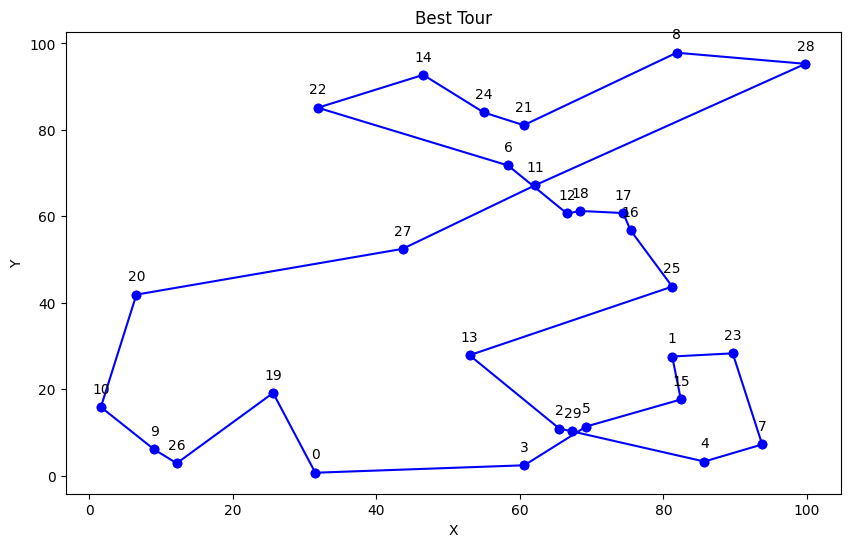

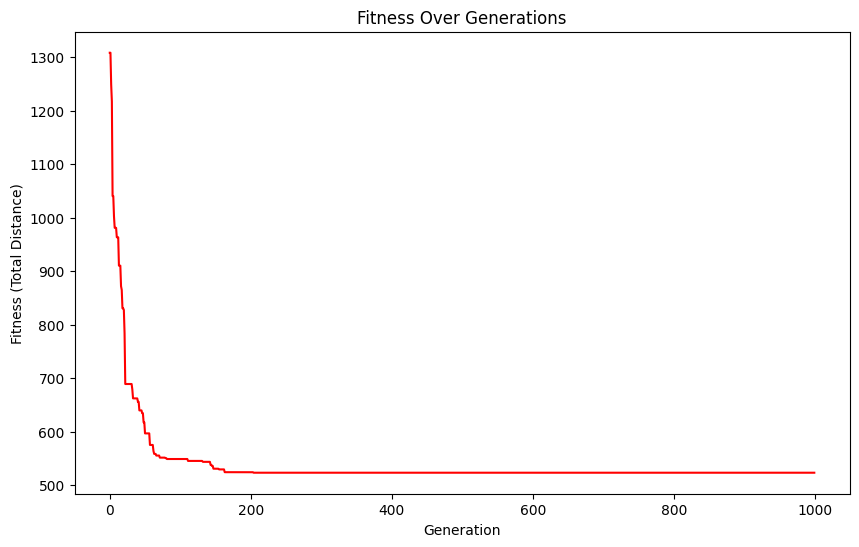

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

class sol:
    def __init__(self):
        self.x = []
        self.fitness = 0.0

def generate_tour(num_cities, distance_matrix):
    sol1 = sol()
    sol1.x = list(np.random.permutation(num_cities))
    sol1.fitness = fitness(sol1.x, distance_matrix)
    return sol1

def fitness(tour, distance_matrix):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += distance_matrix[tour[i]][tour[i + 1]]
    total_distance += distance_matrix[tour[-1]][tour[0]]  # Return to the starting city
    return total_distance

def crossover(sol1, sol2, distance_matrix):
    parent1 = sol1.x
    parent2 = sol2.x
    size = len(parent1)

    start, end = sorted(random.sample(range(size), 2))
    child1 = [None]*size
    child2 = [None]*size

    child1[start:end] = parent1[start:end]
    child2[start:end] = parent2[start:end]

    fill_positions(child1, parent2, end, size)
    fill_positions(child2, parent1, end, size)

    sol_c1 = sol()
    sol_c1.x = child1
    sol_c1.fitness = fitness(sol_c1.x, distance_matrix)

    sol_c2 = sol()
    sol_c2.x = child2
    sol_c2.fitness = fitness(sol_c2.x, distance_matrix)

    return sol_c1, sol_c2

def fill_positions(child, parent, end, size):
    current_pos = end
    for city in parent:
        if city not in child:
            if current_pos >= size:
                current_pos = 0
            while child[current_pos] is not None:
                current_pos += 1
                if current_pos >= size:
                    current_pos = 0
            child[current_pos] = city

def mutate(sol1, distance_matrix):
    parent = sol1.x[:]
    size = len(parent)
    i, j = random.sample(range(size), 2)
    parent[i], parent[j] = parent[j], parent[i]
    sol_m = sol()
    sol_m.x = parent
    sol_m.fitness = fitness(sol_m.x, distance_matrix)
    return sol_m

def generate_pop_mutate(initPopulation, size, distance_matrix):
    tempPop = []
    for _ in range(size):
        sol1 = random.choice(initPopulation)
        sol_m = mutate(sol1, distance_matrix)
        tempPop.append(sol_m)
    return tempPop

def generate_pop_crossover(initPopulation, size, distance_matrix):
    tempCrossover = []
    for _ in range(size):
        sol1 = random.choice(initPopulation)
        sol2 = random.choice(initPopulation)
        sol_c1, sol_c2 = crossover(sol1, sol2, distance_matrix)
        tempCrossover.extend([sol_c1, sol_c2])
    return tempCrossover

def genetic_algorithm(num_cities, distance_matrix, population_size, generations, crossover_rate, mutation_rate):
    population = [generate_tour(num_cities, distance_matrix) for _ in range(population_size)]
    best_fitness = []

    numberOfMutation = int(np.round(mutation_rate * population_size))
    numberOfCrossover = int(np.round(crossover_rate * population_size))

    for generation in range(generations):
        population_mutate = generate_pop_mutate(population, numberOfMutation, distance_matrix)
        population_crossover = generate_pop_crossover(population, numberOfCrossover, distance_matrix)

        combined_population = population + population_mutate + population_crossover
        combined_population = sorted(combined_population, key=lambda z: z.fitness)
        population = combined_population[:population_size]

        best_fitness.append(population[0].fitness)
        if generation % 10 == 0:
            print("Best fitness in generation", generation, ":", population[0].fitness)
        if population[0].fitness == 0.0:
            break

    return min(population, key=lambda z: z.fitness), best_fitness

def plot_tour(tour, cities):
    plt.figure(figsize=(10, 6))
    for i in range(len(tour)):
        plt.plot([cities[tour[i-1]][0], cities[tour[i]][0]], [cities[tour[i-1]][1], cities[tour[i]][1]], 'bo-')
    for idx, city in enumerate(cities):
        plt.annotate(idx, (city[0], city[1]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title('Best Tour')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def plot_fitness(best_fitness):
    plt.figure(figsize=(10, 6))
    plt.plot(best_fitness, 'r-')
    plt.title('Fitness Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Fitness (Total Distance)')
    plt.show()

# Example usage:
# Define parameters for TSP
num_cities = 30
population_size = 50
generations = 1000
crossover_rate = 0.7
mutation_rate = 0.3

# Example coordinates for cities
cities = np.random.rand(num_cities, 2) * 100
distance_matrix = np.sqrt(((cities[:, np.newaxis] - cities[np.newaxis, :])**2).sum(axis=2))

# Running the genetic algorithm for TSP
result, best_fitness = genetic_algorithm(num_cities, distance_matrix, population_size, generations, crossover_rate, mutation_rate)

print("Final tour:", result.x)
print("Total distance:", result.fitness)
plot_tour(result.x, cities)
plot_fitness(best_fitness)
